<a href="https://colab.research.google.com/github/msivaswami/DASML/blob/main/msc_bio_m3_p04_ex1_sol3_schemeA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load the data

In [22]:
df_a = pd.read_csv('scheme_A.csv')
df_b = pd.read_csv('scheme_B.csv')
print(df_b)
df_a[df_a['conf']>0.5]

sorted_df = df_a.sort_values(by='conf',ascending = True )

sorted_df

        conf  class
0   0.957937      0
1   0.911074      1
2   0.905274      0
3   0.828289      0
4   0.771493      0
5   0.734521      0
6   0.707922      1
7   0.629599      0
8   0.591506      1
9   0.581087      1
10  0.494376      1
11  0.467995      0
12  0.406688      0
13  0.370380      0
14  0.343088      1
15  0.274384      1
16  0.196315      1
17  0.180886      1


,conf,class
17,0.051806,1
16,0.114846,1
15,0.134025,1
14,0.200925,1
13,0.223855,0
12,0.257462,0
11,0.258056,1
10,0.334954,0
9,0.445688,1
8,0.524507,1


# Calculate performance measures

## Simple


```python
df_a[df_a['conf']>0.5]
```

would return all entries with conf >0.5

```python
df_a[(df_a['conf']>0.5)&(df_a['class']==0)]
```

returns all entires with conf >0.5 AND class==0


and taking the length ```len(...)``` just measures the length of the resulting data

```python
len(df_a[(df_a['conf']>0.5)&(df_a['class']==0)])
```


Please try out all individually, too.



In [28]:

# TP
#a_tp = len(df_a[(df_a['conf']>0.5)&(df_a['class']==0)])
print(df_a[(df_a['conf']>0.5)&(df_a['class']==0)])
# FN
a_fn = len(df_a[(df_a['conf']>0.5)&(df_a['class']==1)])
# TN
a_tn = len(df_a[(df_a['conf']<=0.5)&(df_a['class']==1)])
# FP
a_fp = len(df_a[(df_a['conf']<=0.5)&(df_a['class']==0)])





       conf  class
0  0.908327      0
1  0.886503      0
2  0.831218      0
3  0.714926      0
4  0.649773      0
7  0.535304      0


## Slightly more complex

Here, we are using:
* a function
* a variable value for the confidence (parameter ```split_value```in the function)
* and we are storing the results in a dictionary for reusability

The function takes an additional parameter for the definition of what should be considered 'positive'.

I put the parameter

```python
calculate_measures=True
```
in later on, to only get TP,FN,FN,TN s

In [29]:
def get_results(df_predictor,split_value=0.5,positive=0,calculate_measures=True):
    res = {
        }

    # TP
    res['TP'] = len(df_predictor[(df_predictor['conf']>=split_value)&(df_predictor['class']==positive)])
    # FN
    res['FN'] = len(df_predictor[(df_predictor['conf']>=split_value)&(df_predictor['class']!=positive)])
    # TN
    res['TN'] = len(df_predictor[(df_predictor['conf']<split_value)&(df_predictor['class']!=positive)])
    # FP
    res['FP'] = len(df_predictor[(df_predictor['conf']<split_value)&(df_predictor['class']==positive)])

    if calculate_measures:
        # accuracy. precision, recall, etc.
        res['accuracy']   = (res['TP']+res['TN'])/(res['TP']+res['FN']+res['TN']+res['FP'])
        res['precision']  = (res['TP'])          /(res['TP']+res['FP'])
        res['recall']     = (res['TP'])          /(res['TP']+res['FN'])
        res['error rate'] = 1-res['accuracy']
        res['f1']         = 2 * (res['precision'] * res['recall']) / (res['precision'] + res['recall'])

        res['tpr']        = res['recall']
        res['fpr']        = (res['FP'])          /(res['FP']+res['TN'])


    return res


a = get_results(df_a)
b = get_results(df_b)


In [30]:
a,b

({'TP': 6,
  'FN': 3,
  'TN': 6,
  'FP': 3,
  'accuracy': 0.6666666666666666,
  'precision': 0.6666666666666666,
  'recall': 0.6666666666666666,
  'error rate': 0.33333333333333337,
  'f1': 0.6666666666666666,
  'tpr': 0.6666666666666666,
  'fpr': 0.3333333333333333},
 {'TP': 6,
  'FN': 4,
  'TN': 5,
  'FP': 3,
  'accuracy': 0.6111111111111112,
  'precision': 0.6666666666666666,
  'recall': 0.6,
  'error rate': 0.38888888888888884,
  'f1': 0.631578947368421,
  'tpr': 0.6,
  'fpr': 0.375})

# ROC curve

First we ensure that the dataframe is sorted by confidence values
We use ```inplace```to tell teh sorting that we want the results to be stored in the same dataframe and
```ascending=False``` to denote that we want it in descending order

In [31]:
df_a.sort_values(['conf'],inplace=True,ascending=False)
df_b.sort_values(['conf'],inplace=True,ascending=False)

## Calculate the absolute numbers for TP and FN re-using the function from before
it uses ```DataFrame.apply()``` which allows to apply an arbitrary function of a particular column
Furthermore, it uses an unnamed lambda function , taking each
value from 'conf' and calls the ```get_results``` from before


In [32]:
df_a['TP'] = df_a['conf'].apply(lambda x: get_results(df_a,split_value=x,calculate_measures=False)['TP'])
df_a['FN'] = df_a['conf'].apply(lambda x: get_results(df_a,split_value=x,calculate_measures=False)['FN'])

### Get the rates

Now, just take the maximum number of TPs (=total number of positives) and maximum FN (=total number of negatives)

In [33]:
df_a['tpr'] = df_a['TP']/df_a['TP'].max()
df_a['fpr'] = df_a['FN']/df_a['FN'].max()


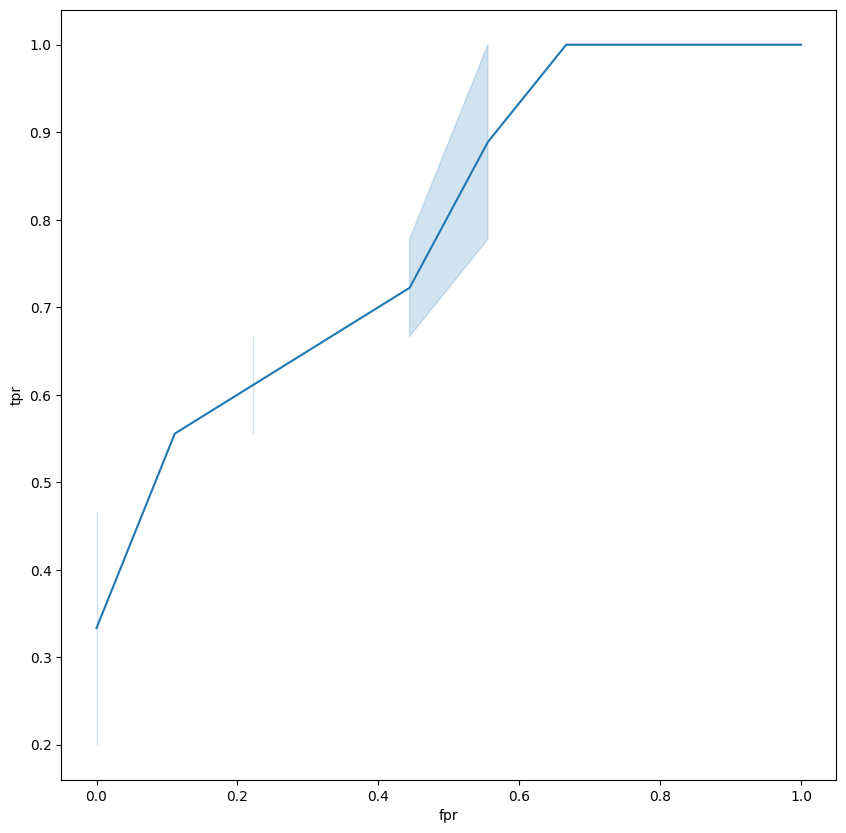

In [34]:
plt.figure(figsize = (10, 10)) # determines the size of the plot area

ax = sns.lineplot(x='fpr',y='tpr',data=df_a)


In [36]:
df_b['TP'] = df_a['conf'].apply(lambda x: get_results(df_b,split_value=x,calculate_measures=False)['TP'])
df_b['FN'] = df_a['conf'].apply(lambda x: get_results(df_b,split_value=x,calculate_measures=False)['FN'])

In [37]:
df_b['tpr'] = df_b['TP']/df_b['TP'].max()
df_b['fpr'] = df_b['FN']/df_b['FN'].max()

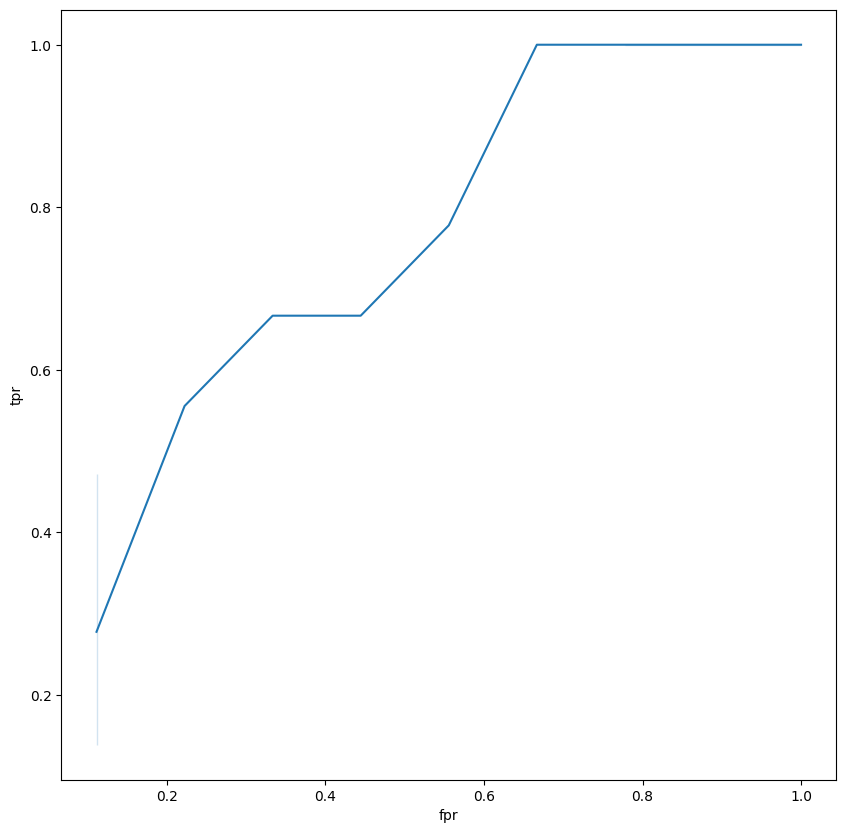

In [38]:
plt.figure(figsize = (10, 10)) # determines the size of the plot area

bx = sns.lineplot(x='fpr',y='tpr',data=df_b)

